<a href="https://colab.research.google.com/github/Aamir-Khan-Maarofi/GIKI-DNN-Bootcamp-Tasks/blob/master/GIKI_DNN_D1_Lab_Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIKI DNN Bootcamp - D1 - Lab Task # 01

## Lab Task Description:

1. **Implement Simple Linear Regression Model**: Implement a simple linear regression model with one variable using more than 3 training examples (5-10 examples).
   
2. **Implement Cost Function**: Implement the cost function and find the best fit line for the training datasets.

3. **Visualize Training Dataset**: Visualize the training dataset through different graphs:
   - _`matplotlib scatter` function_
   - _`matplotlib` plot function_
   - _`plt_intuition` from utils_
   - _`soup_bowl` form utils_  

4. **Optional**: Try to implement gradient descent and optimize the cost function.



## Required Libraries For This Notebook

In [3]:
%%capture
# !pip install ipywidgets
import numpy as np
import matplotlib.pyplot as plt
# import lab_utils_uni as luu

### 1. Dataset Description
`x_train` : _*np vector*_ House Sizes (in 1000 sqfts)

`y_train` : _*np vector*_ House Prices (in 1000s of dollars)

Tabular description of the dataset is listed here

| Size (1000 sqft) | Price (\$1000s) |
| ---------------- | -------------- |
| 7.5              | \$900.5        |
| 4.5              | \$600.5        |
| 8.5              | \$1000.5       |
| 10.5             | \$1200.5       |
| 6.5              | \$800.5        |
| 3.5              | \$500.5        |
| 9.5              | \$1100.5       |
| 1.5              | \$300.5        |
| 2.5              | \$400.5        |
| 5.5              | \$700.5        |

Text(0, 0.5, 'Price (1000s of dollars)')

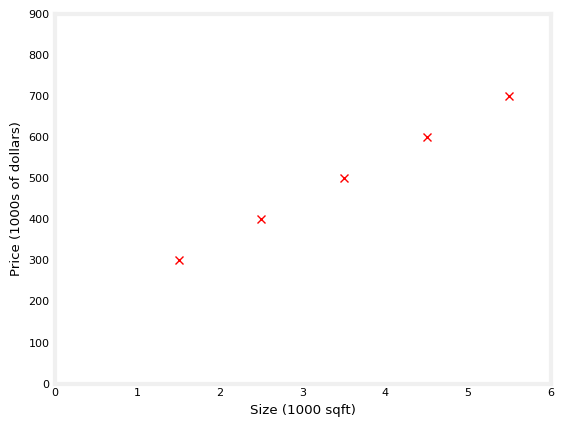

In [4]:
# Sample Dataset

# Tried with this dataset but the minimum in this case was at 499.99, it was not possible to decrease it
# Two possible options at this stage, either increase the dataset (increase m), or remove outliers (since it's a smaller dataset, even the closed ones are considered outlier)
# x_train = np.array([2.5, 3.0, 1.9, 3.8, 2.7, 2.3, 3.4, 2.6, 2.1, 3.6])
# y_train = np.array([310.0, 450.0, 180.0, 630.0, 390.0, 320.0, 480.0, 340.0, 250.0, 570.0])

# With the following dataset, it's clear that gradient descent will find the correct global minimum
# But I can see that they are almost on a linear line now (not fun)
x_train = np.array([7.5, 4.5, 8.5, 10.5, 6.5, 3.5, 9.5, 1.5, 2.5, 5.5])
# y_train = np.array([900.5, 600.5, 1000.5, 1200.5, 800.5, 500.5, 1100.5, 300.5, 400.5, 700.5])
y_train = np.array([900, 600, 1000, 1200, 800, 500, 1100, 300, 400, 700])

plt.plot(x_train, y_train, 'rx')
plt.axis([0, 6, 0, 900])
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (1000s of dollars)')

### 2. Linear Regressor Implementation
- Cost Function: `compute_mean_squared_error` function
- Gradient Descent: `gradient_descent` function
- Linear Regressor Model Computation `compute_linear_regressor`

_All the above functions along with the rest of computation is done using numpy library_


In [16]:
# batch size (size of the whole dataset) represented by m
m = x_train.shape[0] # m = len(x_train)

# initialize weight and bias
[weight, bias] = [20, 10]

# initialize learning rate and threshold
[learning_rate, threshold] = [0.01, 0.00001]

# compute the linear regreassor model
def compute_linear_regressor(x_train, weight, bias):
  return x_train * weight + bias


# compute mean squared error (mse)
def compute_mean_squared_error(y_train, y_pred):
  # calculate losses in vectorized form, sum their squre and average
  return np.sum((y_train - y_pred)**2) / (2 * m);

# compute gradient descent
def gradient_descent(x_train, y_train, weight, bias, learning_rate, threshold):
  while True:
    # compute linear regressor
    y_pred = compute_linear_regressor(x_train, weight, bias)

    # compute cost for the whole batch (m y_preds)
    cost = compute_mean_squared_error(y_train, y_pred)

    # stop gradient descent when the error is less than threshold
    if (cost < threshold):
      break

    # compute gradients for wieght bias
    dw = (1/m) * np.sum(x_train * (y_pred - y_train))
    db = (1/m) * np.sum(y_pred - y_train)

    # update weight and bias
    weight = weight - learning_rate * dw
    bias = bias - learning_rate * db

    print("------------------------------------------------------")
    print("|  Weight: {}, Bias: {}, Cost: {} |".format('%.5f'%weight, '%.5f'%bias, '%.5f'%cost))
    print("------------------------------------------------------\n")

  return weight, bias


weight, bias = gradient_descent(x_train, y_train, weight, bias, learning_rate, threshold)

Streaming output truncated to the last 5000 lines.
------------------------------------------------------
|  Weight: 100.01390, Bias: 149.89789, Cost: 0.00098 |
------------------------------------------------------

------------------------------------------------------
|  Weight: 100.01388, Bias: 149.89807, Cost: 0.00097 |
------------------------------------------------------

------------------------------------------------------
|  Weight: 100.01385, Bias: 149.89826, Cost: 0.00097 |
------------------------------------------------------

------------------------------------------------------
|  Weight: 100.01383, Bias: 149.89845, Cost: 0.00097 |
------------------------------------------------------

------------------------------------------------------
|  Weight: 100.01380, Bias: 149.89863, Cost: 0.00096 |
------------------------------------------------------

------------------------------------------------------
|  Weight: 100.01378, Bias: 149.89882, Cost: 0.00096 |
---------

### 3. Linear Regressor Tester

In [6]:
# test cases from the actual sample data
x_test = np.array([7.5, 10.5, 1.5])

# predict the prices with the learned weight and bias
y_pred = compute_linear_regressor(x_test, weight, bias)

# Pretty print the prices and sizes in one string
for size, price in zip(x_test, y_pred):
  print("For house with size {} the Price is ${}K".format(size * 1000, int(price)))

For house with size 7500.0 the Price is $900K
For house with size 10500.0 the Price is $1200K
For house with size 1500.0 the Price is $299K


### 4. Inputs and Model visualization
- Through `maptplotlib.pyplot.plot`
- And `matplotlib.pyplot.scatter`

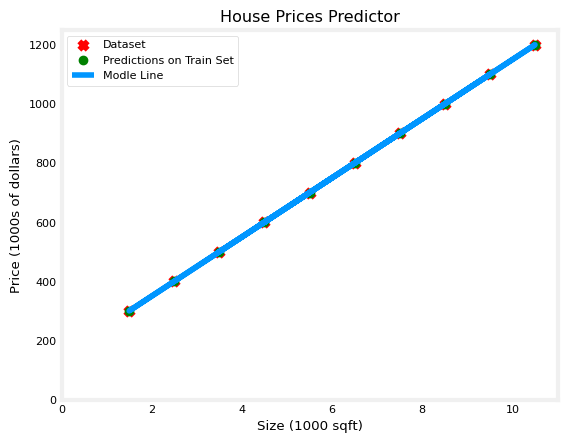

In [7]:
y_pred = compute_linear_regressor(x_train, weight, bias)

plt.scatter(x_train, y_train, marker='x', color='red', label = "Dataset")
plt.plot(x_train, y_train, 'og', label = "Predictions on Train Set")
plt.plot(x_train, y_pred, label = "Modle Line")
plt.axis([0, 11, 0, 1250])
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (1000s of dollars)')
plt.title('House Prices Predictor')
plt.legend()

### 5. Model Training Visuralization
- Through `lab_utils_uni.plt_intuition` and `soup_bowl` functions

In [11]:
luu.plt_intuition(x_train, y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=5), Output()), _dom_classes=('widget…

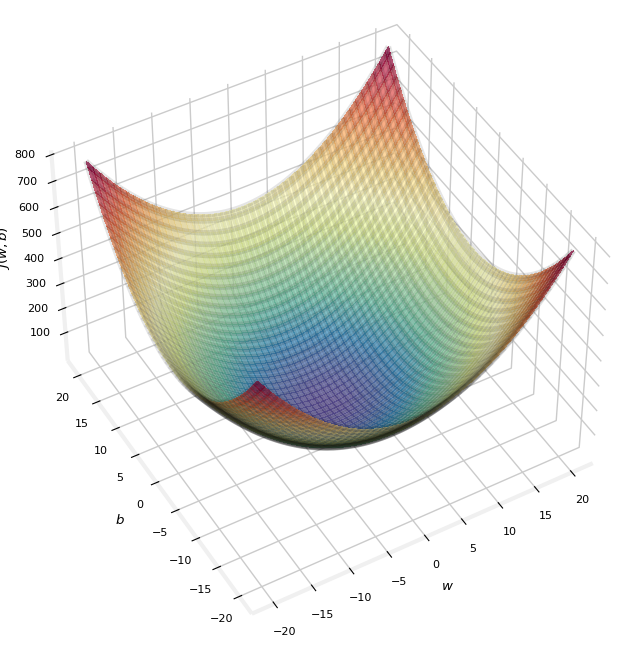

In [13]:
luu.soup_bowl()